https://github.com/JeongJiHeon/ScoreDiffusionModel/blob/main/NCSN/NCSN_MNIST.ipynb

In [1]:
import pathlib

current_dir = pathlib.Path.cwd()
project_dir = current_dir / "data" / "ncsn"
project_dir.mkdir(exist_ok=True, parents=True)
print(f"Created a directory: {project_dir}")

import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)

Created a directory: /root/ghq/github.com/py-img-gen/python-image-generation/notebooks/data/ncsn


In [2]:
from py_img_gen.trainers import TrainNCSNConfig

train_config = TrainNCSNConfig(
    num_epochs=150,
    num_timesteps=10,
    num_annealed_timesteps=100,
    output_dir=project_dir,
)
print(train_config)

TrainNCSNConfig(output_dir=PosixPath('/root/ghq/github.com/py-img-gen/python-image-generation/notebooks/data/ncsn'), seed=42, batch_size=256, num_epochs=150, num_timesteps=10, lr=0.0001, num_workers=4, num_annealed_timesteps=100, sampling_eps=1e-05)


In [3]:
from py_img_gen.trainers import EvalConfig

eval_config = EvalConfig(eval_epoch=10)
print(eval_config)

EvalConfig(eval_epoch=10, num_generate_images=16, num_grid_rows=4, num_grid_cols=4)


In [4]:
from py_img_gen.trainers import NCSNModelConfig

model_config = NCSNModelConfig()
print(model_config)

NCSNModelConfig(sample_size=32, in_channels=1, out_channels=1, block_out_channels=(64, 128, 256, 512), layers_per_block=3, down_block_types=('DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'DownBlock2D'), up_block_types=('UpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D'), sigma_min=0.005, sigma_max=10)


In [5]:
from transformers import set_seed

set_seed(seed=train_config.seed)

In [6]:
from dataclasses import asdict

from ncsn.unet import UNet2DModelForNCSN

unet = UNet2DModelForNCSN(
    num_train_timesteps=train_config.num_timesteps,
    **asdict(model_config),
)
unet = unet.to(device)

In [7]:
from ncsn.scheduler import (
    AnnealedLangevinDynamicsScheduler,
)

noise_scheduler = AnnealedLangevinDynamicsScheduler(
    num_train_timesteps=train_config.num_timesteps,
    num_annealed_steps=train_config.num_annealed_timesteps,
    sigma_min=model_config.sigma_min,
    sigma_max=model_config.sigma_max,
    sampling_eps=train_config.sampling_eps,
)

In [8]:
optim = torch.optim.Adam(
    unet.parameters(), lr=train_config.lr
)

In [9]:
from py_img_gen.trainers import (
    get_simple_resize_transforms,
)

transform = get_simple_resize_transforms(
    sample_size=model_config.sample_size
)
print(transform)

Compose(
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [10]:
import torchvision
from torch.utils.data import DataLoader

dataset = torchvision.datasets.MNIST(
    root="~/.cache",
    train=True,
    download=True,
    transform=transform,
)

data_loader = DataLoader(
    dataset=dataset,
    batch_size=train_config.batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=train_config.num_workers,
)

In [11]:
from py_img_gen import trainers

trainers.train(
    train_config=train_config,
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
    optim=optim,
    data_loader=data_loader,
    device=device,
)

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/10 [00:00<?, ?it/s]

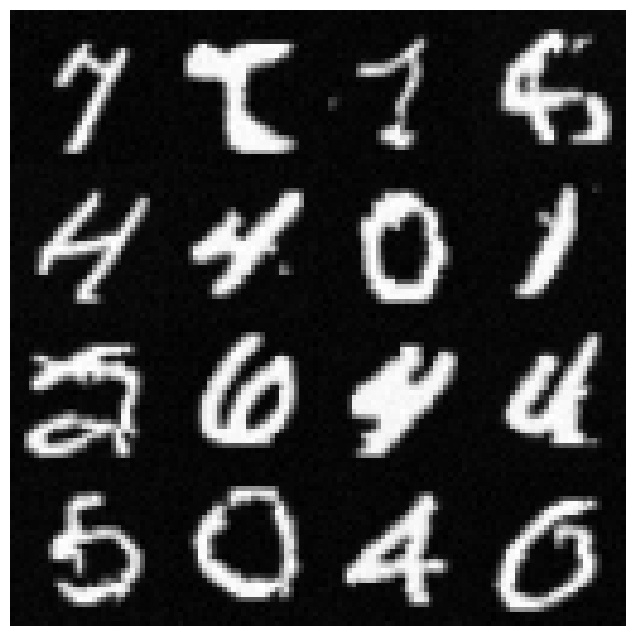

In [12]:
from IPython.display import HTML
from py_img_gen import inferencers

ani = inferencers.animation_inference(
    train_config=train_config,
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
)

HTML(ani.to_jshtml())

In [13]:
from ncsn.pipeline_ncsn import NCSNPipeline

pipe = NCSNPipeline(unet=unet, scheduler=noise_scheduler)
pipe = pipe.to(device)

  0%|          | 0/10 [00:00<?, ?it/s]

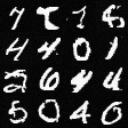

In [14]:
from diffusers.utils import make_image_grid

output = pipe(
    num_inference_steps=train_config.num_timesteps,
    batch_size=eval_config.num_generate_images,
    generator=torch.manual_seed(train_config.seed),
)
image = make_image_grid(
    images=output.images,
    rows=eval_config.num_grid_rows,
    cols=eval_config.num_grid_cols,
)
image